In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [49]:
data=pd.read_csv('insurance.csv')

In [50]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [51]:
data=data.drop_duplicates()

In [52]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [54]:
data = pd.get_dummies(data, columns = ['sex', 'region','smoker'], drop_first = True)

In [55]:
data.head()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.900,0,16884.92400,False,False,False,True,True
1,18,33.770,1,1725.55230,True,False,True,False,False
2,28,33.000,3,4449.46200,True,False,True,False,False
3,33,22.705,0,21984.47061,True,True,False,False,False
4,32,28.880,0,3866.85520,True,True,False,False,False


In [56]:
data['sex_male']=data['sex_male'].astype(int)
data['region_southeast'] = data['region_southeast'].astype(int)
data['region_northwest'] = data['region_northwest'].astype(int)
data['region_southwest'] = data['region_southwest'].astype(int)
data['smoker_yes'] = data['smoker_yes'].astype(int)

In [57]:
data.head()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0


In [58]:
#normalizing the data
# data['charges']=((data['charges']-data['charges'].mean())/data['charges'].std())
# data['bmi']=((data['bmi']-data['bmi'].mean())/data['bmi'].std())
data=(data-data.mean())/data.std()
data.head()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,-1.439879,-0.452990,-0.908894,0.297745,-1.009393,-0.565334,-0.611409,1.763949,1.968924
1,-1.511082,0.509231,-0.079412,-0.954024,0.989953,-0.565334,1.634343,-0.566486,-0.507512
2,-0.799051,0.383011,1.579552,-0.729100,0.989953,-0.565334,1.634343,-0.566486,-0.507512
3,-0.443036,-1.304564,-0.908894,0.718835,0.989953,1.767542,-0.611409,-0.566486,-0.507512
4,-0.514239,-0.292347,-0.908894,-0.777208,0.989953,1.767542,-0.611409,-0.566486,-0.507512


In [59]:
#correlation matrix
data.corr()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
age,1.000000,0.109344,0.041536,0.298308,-0.019814,0.001495,-0.012311,0.009415,-0.025587
bmi,0.109344,1.000000,0.012755,0.198401,0.046397,-0.136138,0.270057,-0.006211,0.003746
children,0.041536,0.012755,1.000000,0.067389,0.017848,0.026044,-0.023492,0.021538,0.007331
charges,0.298308,0.198401,0.067389,1.000000,0.058044,-0.038695,0.073578,-0.043637,0.787234
sex_male,-0.019814,0.046397,0.017848,0.058044,1.000000,-0.012482,0.017578,-0.003767,0.076596
region_northwest,0.001495,-0.136138,0.026044,-0.038695,-0.012482,1.000000,-0.345909,-0.320493,-0.036321
region_southeast,-0.012311,0.270057,-0.023492,0.073578,0.017578,-0.345909,1.000000,-0.346614,0.068282
region_southwest,0.009415,-0.006211,0.021538,-0.043637,-0.003767,-0.320493,-0.346614,1.000000,-0.037168
smoker_yes,-0.025587,0.003746,0.007331,0.787234,0.076596,-0.036321,0.068282,-0.037168,1.000000


In [60]:
split=0.8
train_y=data['charges'][:int(split*len(data))]
train_x=data.drop('charges',axis=1)[:int(split*len(data))]

train_x=train_x.values
train_y=train_y.values

test_y=data['charges'][int(split*len(data)):]
test_x=data.drop('charges',axis=1)[int(split*len(data)):]

test_x=test_x.values
test_y=test_y.values

ones=np.ones((train_x.shape[0],1))
train_x=np.hstack((ones,train_x))

test_x=np.hstack((np.ones((test_x.shape[0],1)),test_x))

print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)


(1069, 9) (1069,) (268, 9) (268,)


In [61]:
def hypothesis(x,w):
    return np.dot(x,w)

In [62]:
def loss_function(x,y,w):
    y_p = hypothesis(x, w)
    y=y.reshape(-1,1)
    error = (y_p - y)**2
    return error/(x.shape[0]) 

In [63]:
def gradient(x,y,w):
    y_p = hypothesis(x, w)
    y=y.reshape(-1,1)
    grad = np.dot(x.T, (y_p-y))
    return grad/(x.shape[0])

In [64]:
def gradient_descent(x,y):
    weight = np.zeros((x.shape[1], 1))
    learning_rate=0.03
    epochs=1000
    error_list=[]
    for i in range(epochs):
        error=loss_function(x,y,weight)
        error=np.array(error).mean()
        error_list.append(error) 
        weight=weight-learning_rate*gradient(x,y,weight)
    return weight,error_list

In [65]:
weight,error_list=gradient_descent(train_x,train_y)
print(weight)
print(error_list[-1])

[[-0.00699677]
 [ 0.30081053]
 [ 0.1708987 ]
 [ 0.04364456]
 [-0.01040406]
 [-0.01654306]
 [-0.04116161]
 [-0.04414523]
 [ 0.7886516 ]]
0.000232206168964425


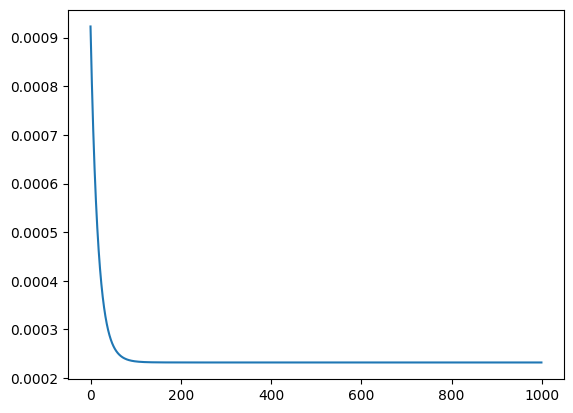

In [66]:
plt.plot(error_list)

In [67]:
y_pred=hypothesis(test_x,weight)

In [68]:
print(y_pred)

[[ 1.63099841]
 [ 0.13349577]
 [-0.81000276]
 [-0.03792189]
 [-0.27722275]
 [-0.61788322]
 [-0.2395286 ]
 [-0.91778315]
 [ 1.25103263]
 [ 0.21171522]
 [-1.12113271]
 [-0.63400329]
 [-0.72638206]
 [-0.59561656]
 [ 0.14007699]
 [ 1.30318442]
 [-0.10704802]
 [-0.03094766]
 [ 0.29814292]
 [-0.38110342]
 [ 1.78433009]
 [-0.06229469]
 [-0.68236273]
 [ 1.16131002]
 [-0.01904166]
 [-0.66739357]
 [ 2.02119228]
 [-0.77197471]
 [-0.09727596]
 [-0.64455198]
 [ 1.19121416]
 [-0.154661  ]
 [-0.4410093 ]
 [ 0.0638088 ]
 [-0.57234959]
 [-0.13665234]
 [-0.22673812]
 [-0.23670668]
 [-0.76614946]
 [-0.54668706]
 [ 0.0216837 ]
 [ 1.76180034]
 [ 1.64549216]
 [-0.66905308]
 [-0.91752719]
 [-0.05977257]
 [-0.20726774]
 [ 1.30540462]
 [ 1.50834532]
 [-0.80452509]
 [ 1.146458  ]
 [-0.0622608 ]
 [ 2.1148657 ]
 [-0.55395829]
 [ 1.60349721]
 [-0.06260511]
 [-0.18401263]
 [-0.34177694]
 [-0.51636104]
 [-1.25084094]
 [-0.48338342]
 [-0.26310536]
 [ 0.25248787]
 [-0.48716479]
 [-0.58821628]
 [-0.14727764]
 [-0.49988

TypeError: hypothesis() missing 1 required positional argument: 'w'

In [ ]:
def r2_score(y,y_p):
    num=np.sum((y-y_p)**2)
    denom=np.sum((y-y.mean())**2)
    score=1-(num/denom)
    return score

In [ ]:
r2_score(test_y,y_pred)

-459.9935942806783